In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#To get lat and lang
from geopy.geocoders import Nominatim

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-prices/sample_submission.csv
/kaggle/input/housing-prices/train.csv
/kaggle/input/housing-prices/test.csv


In [34]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)

In [35]:
train = pd.read_csv('/kaggle/input/housing-prices/train.csv')
test = pd.read_csv('/kaggle/input/housing-prices/test.csv')

test['SalePrice'] = 0
# train['set'] = 'train'
# test['set'] = 'test'

# Combine datasets for uniform processing (optional)
# combined = pd.concat([train, test], axis=0)

# combined.head()

In [36]:
# df = pd.DataFrame({
#     'columns': combined.columns,
#     'data_type': combined.dtypes.values,
#     'missing_values': round((combined.isnull().sum() / len(combined)) * 100,0)
# })
# df
train.head(3)
#print(train.shape, test.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [37]:
# combined.drop(missing_columns[missing_columns>90].index.to_list(),inplace=True,axis=1)
# combined.head(2)
for i in ['MSSubClass', 'OverallQual', 'OverallCond']:
    train[i] = train[i].astype(object)
    test[i] = test[i].astype(object)
    
cols_to_consider = ['Id',
'LotFrontage',
'LotArea',
'OverallQual',
'OverallCond',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'BsmtFullBath',
'BsmtHalfBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'TotRmsAbvGrd',
'Fireplaces',
'GarageCars',
'GarageArea',
'OpenPorchSF',
'PoolArea',
'MiscVal',
'MSZoning',
'LotShape',
'LandContour',
'Utilities',
'LotConfig',
'LandSlope',
'Neighborhood',
'Condition1',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'ExterQual',
'ExterCond',
'Foundation',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'Heating',
'HeatingQC',
'CentralAir',
'Electrical',
'KitchenQual',
'Functional',
'FireplaceQu',
'GarageType',
'GarageFinish',
'GarageQual',
'GarageCond',
'PavedDrive',
'SaleType',
'SaleCondition',
'YearBuilt',
'YearRemodAdd',
'YrSold',
'SalePrice'] 

In [38]:
# train[cols_to_consider].head(10)
#build area = 1stFlrSF + 2ndFlrSF this is GrLivArea
#%build area = GrLivArea/LotArea
#fullbaths = BsmtFullBath + FullBath
#halfbaths = BsmtHalfBath + HalfBath
#remove GarageCars keep GarageArea
#create a pool_flag
#remodel_flag = if YearBuilt != YearRemodAdd
#Age_sold = YrSold-YearBuilt
#%lowqualitySF = LowQualFinSF/GrLivArea
train['build_area_perct'] = round(train['GrLivArea']/train['LotArea'],2)
test['build_area_perct'] = round(test['GrLivArea']/test['LotArea'],2)

train['unfinished_bsmt_perct'] = round(train['BsmtUnfSF']/train['TotalBsmtSF'],2)
test['unfinished_bsmt_perct'] = round(test['BsmtUnfSF']/test['TotalBsmtSF'],2)

train['fullbaths'] = train['BsmtFullBath'] + train['FullBath']
test['fullbaths'] = test['BsmtFullBath'] + test['FullBath']

train['halfbaths'] = train['BsmtHalfBath'] + train['HalfBath']
test['halfbaths'] = test['BsmtHalfBath'] + test['HalfBath']

train['pool_flag'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test['pool_flag'] = test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

train['porch_flag'] = train['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
test['porch_flag'] = test['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)

train['remodel_flag'] = (train['YearBuilt'] != train['YearRemodAdd']).astype(int)
test['remodel_flag'] = (test['YearBuilt'] != test['YearRemodAdd']).astype(int)

train['age_when_sold'] = train['YrSold'] - train['YearBuilt']
test['age_when_sold'] = test['YrSold'] - test['YearBuilt']

cols_to_drop = ['BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','GarageCars','YearBuilt','YearRemodAdd','YrSold']

train.drop(cols_to_drop,inplace=True,axis=1)
test.drop(cols_to_drop,inplace=True,axis=1)
print(train.shape, test.shape)

train.head(5)

(1460, 77) (1459, 77)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,build_area_perct,unfinished_bsmt_perct,fullbaths,halfbaths,pool_flag,porch_flag,remodel_flag,age_when_sold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,150,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,WD,Normal,208500,0.20,0.18,3,1,0,1,0,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,WD,Normal,181500,0.13,0.23,2,1,0,0,0,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,WD,Normal,223500,0.16,0.47,3,1,0,1,1,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,540,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,WD,Abnorml,140000,0.18,0.71,2,0,0,1,1,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,490,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,WD,Normal,250000,0.15,0.43,3,1,0,1,0,8


In [39]:
missing_cols = train.isnull().sum()*(100)/len(train)
missing_cols = missing_cols[missing_cols > 0]
missing_cols

# for i in list(missing_cols.index): 
#     print(i, train[i].value_counts())
#     print('-------------------')
cols_to_drop = ['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature']

train.drop(cols_to_drop,inplace=True,axis=1)
test.drop(cols_to_drop,inplace=True,axis=1)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


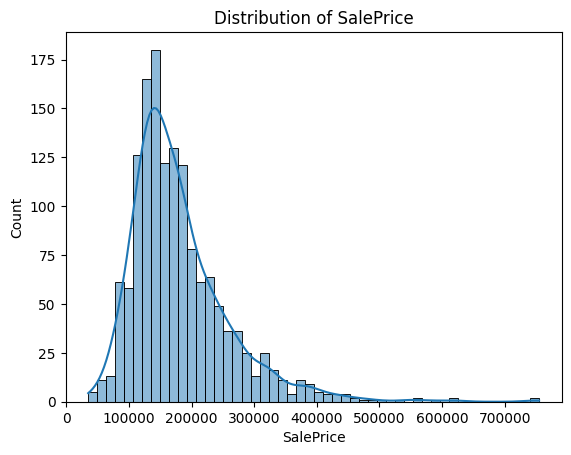

In [40]:
#exploring target variable : SalePrice
train['SalePrice'].describe()
# Right-skewed: Mean > Median > Mode
# Left-skewed: Mean < Median < Mode
# Normal Distribution: Mean ≈ Median ≈ Mode

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.histplot(train['SalePrice'], bins=50, kde=True)
plt.title("Distribution of SalePrice")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


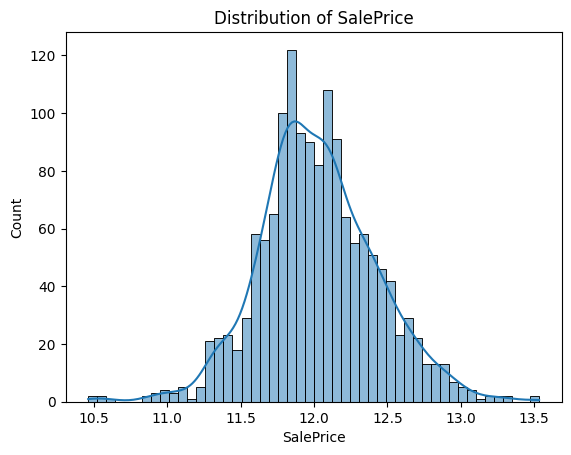

In [41]:
sns.histplot(np.log(train['SalePrice']), bins=50, kde=True)
plt.title("Distribution of SalePrice")
plt.show()

In [42]:
#changing the target variable to SalePrice_log
train['SalePrice_log'] = np.log(train['SalePrice'])

In [43]:
missing_cols = train.isnull().sum()*(100)/len(train)
missing_cols = missing_cols[missing_cols > 0]
missing_cols

LotFrontage              17.739726
MasVnrArea                0.547945
BsmtQual                  2.534247
BsmtCond                  2.534247
BsmtExposure              2.602740
BsmtFinType1              2.534247
BsmtFinType2              2.602740
Electrical                0.068493
GarageType                5.547945
GarageYrBlt               5.547945
GarageFinish              5.547945
GarageQual                5.547945
GarageCond                5.547945
unfinished_bsmt_perct     2.534247
dtype: float64

In [44]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,build_area_perct,unfinished_bsmt_perct,fullbaths,halfbaths,pool_flag,porch_flag,remodel_flag,age_when_sold,SalePrice_log
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,150,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,548,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,208500,0.20,0.18,3,1,0,1,0,5,12.247694
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,460,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,181500,0.13,0.23,2,1,0,0,0,31,12.109011
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,608,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,223500,0.16,0.47,3,1,0,1,1,7,12.317167


In [45]:
# Function to impute missing values based on mode within groups
def impute_by_mode(df, target_col, group_col):
    df[target_col] = df.groupby(group_col)[target_col].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "NA")).reset_index(drop=True)

# Impute using OverallQual
impute_by_mode(train, 'BsmtQual', 'OverallQual')
impute_by_mode(train, 'BsmtExposure', 'OverallQual')
impute_by_mode(train, 'BsmtFinType1', 'OverallQual')
impute_by_mode(train, 'BsmtFinType2', 'OverallQual')

impute_by_mode(test, 'BsmtQual', 'OverallQual')
impute_by_mode(test, 'BsmtExposure', 'OverallQual')
impute_by_mode(test, 'BsmtFinType1', 'OverallQual')
impute_by_mode(test, 'BsmtFinType2', 'OverallQual')

impute_by_mode(train, 'BsmtCond', 'OverallQual')
impute_by_mode(test, 'BsmtCond', 'OverallQual')

#filling LotFrontage on the basis of median value of LotArea.
median_ratio = (train['LotFrontage']/train['LotArea']).median()
train['LotFrontage'].fillna(train['LotArea']*median_ratio,inplace=True)
test['LotFrontage'].fillna(test['LotArea']*median_ratio,inplace=True)

median_ratio = (train['MasVnrArea']/train['LotArea']).median()
train['MasVnrArea'].fillna(train['LotArea']*median_ratio,inplace=True)
test['MasVnrArea'].fillna(test['LotArea']*median_ratio,inplace=True)

In [46]:
train.drop(['GarageYrBlt','Electrical'],inplace=True,axis=1)
test.drop(['GarageYrBlt','Electrical'],inplace=True,axis=1)

#filling NA for garagetype fields
garage_fields = ['GarageType','GarageFinish','GarageQual','GarageCond','unfinished_bsmt_perct']
for i in garage_fields: 
    if i == 'unfinished_bsmt_perct': 
        train[i].fillna(1,inplace=True)
        test[i].fillna(1,inplace=True)
    else:
        train[i].fillna('NA',inplace=True)
        test[i].fillna('NA',inplace=True)

In [47]:
missing_cols = train.isnull().sum()*(100)/len(train)
missing_cols = missing_cols[missing_cols > 0]
missing_cols
#no missing values in training set. 

Series([], dtype: float64)

In [48]:
# from collections import Counter

# def IQR_method (df,n,features):
#     """
#     Takes a dataframe and returns an index list corresponding to the observations 
#     containing more than n outliers according to the Tukey IQR method.
#     """
#     outlier_list = []
    
#     for column in features:
                
#         # 1st quartile (25%)
#         Q1 = np.percentile(df[column], 25)
#         # 3rd quartile (75%)
#         Q3 = np.percentile(df[column],75)
        
#         # Interquartile range (IQR)
#         IQR = Q3 - Q1
        
#         # outlier step
#         outlier_step = 1.25 * IQR
        
#         # Determining a list of indices of outliers
#         outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        
#         # appending the list of outliers 
#         outlier_list.extend(outlier_list_column)
        
#     # selecting observations containing more than x outliers
#     outlier_list = Counter(outlier_list)        
#     multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
#     # Calculate the number of records below and above lower and above bound value respectively
#     df1 = df[df[column] < Q1 - outlier_step]
#     df2 = df[df[column] > Q3 + outlier_step]
    
#     print('Total number of deleted outliers:', df1.shape[0]+df2.shape[0])
    
#     return multiple_outliers

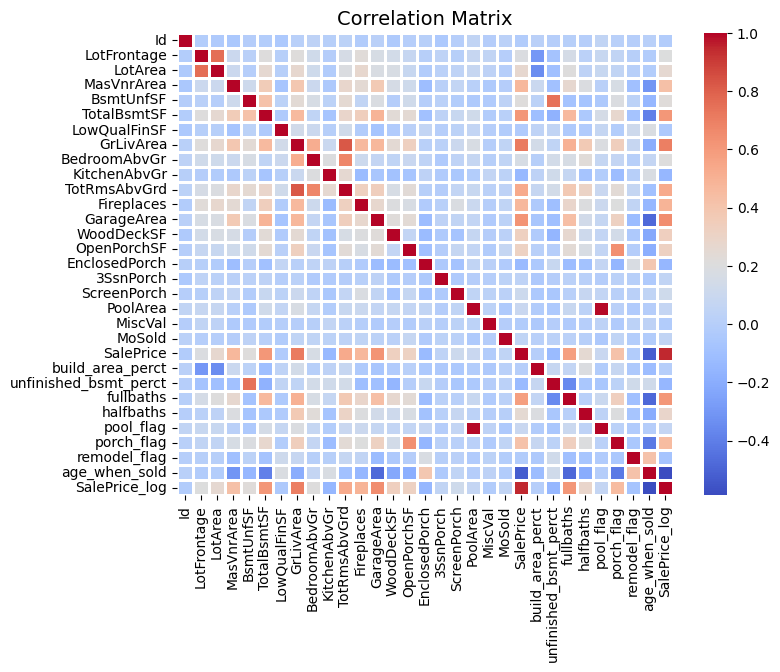

In [49]:
# cols = ['OverallQual', 'OverallCond', 'SalePrice', 'LotArea']
# Select numeric columns
numeric_columns = train.select_dtypes(include=np.number).columns.tolist()

# Compute correlation matrix
corr_matrix = train[numeric_columns].corr()

# Plot heatmap with labels
plt.figure(figsize=(8, 6))  # Adjust figure size for better visibility
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=2, 
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)

# Add title
plt.title("Correlation Matrix", fontsize=14)

# Show plot
plt.show()

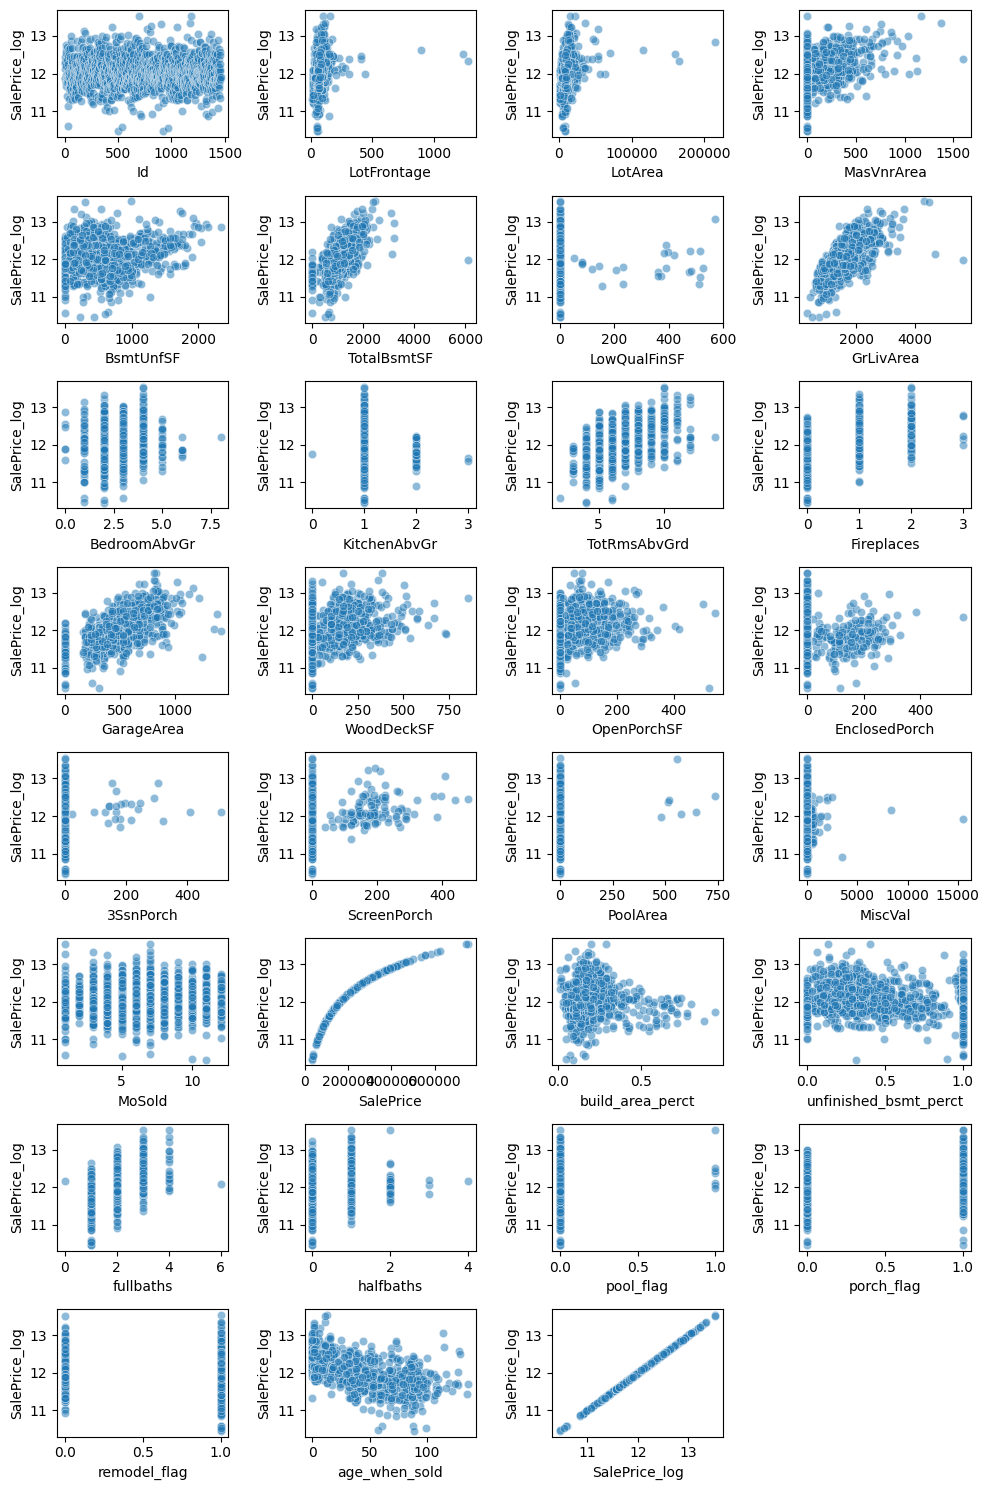

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns


# Scatterplot of numerical features against SalePrice
plt.figure(figsize=(10, 15))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(8, 4, i)
    sns.scatterplot(data=train, x=col, y='SalePrice_log', alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('SalePrice_log')
plt.tight_layout()
plt.show()


In [51]:
# train.head(2)

# categorical_columns = ['Condition1','Condition2',
#                        'OverallQual','OverallCond',
#                        'ExterQual','BsmtQual','BsmtCond',
#                        'BsmtExposure','HeatingQC','KitchenQual',
#                       'GarageQual','GarageCond']

# for i in categorical_columns: 
#     print('saleprice trend with',i)
#     print(train.groupby(i)['SalePrice'].mean())

In [52]:
#removing all the observations with LotArea > 100000 as they are outliers
# train = train[~(train['LotArea']>200000)]
# test[test['LotArea']>100000]

In [53]:
for col in test.columns[test.isnull().sum() > 0]:  
    if np.issubdtype(test[col].dtype, np.number): # Numeric columns
        test[col].fillna(test[col].mean(), inplace=True)
    else:  # Categorical columns
        test[col].fillna(test[col].mode()[0], inplace=True)
        
#missing values in test data
missing_cols = test.isnull().sum()*(100)/len(test)
missing_cols = missing_cols[missing_cols > 0]
missing_cols

Series([], dtype: float64)

In [54]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'build_area_perct',
       'unfinished_bsmt_perct', 'fullbaths', 'halfbat

In [55]:
len(train.drop(columns=['Id', 'SalePrice', 'SalePrice_log']).columns)

67

In [56]:
len(test.drop(columns=['Id','SalePrice']).columns)

67

In [57]:
# Convert object-type columns to categorical
for col in train.select_dtypes(include=['object']).columns:
    train[col] = train[col].astype('category')

# Convert object-type columns to categorical
for col in test.select_dtypes(include=['object']).columns:
    test[col] = test[col].astype('category')

In [58]:
#preparing data for modelling 
from sklearn.model_selection import train_test_split

# Drop 'Id' and separate features & target
X = train.drop(columns=['Id', 'SalePrice', 'SalePrice_log'])
y = train['SalePrice_log']

# Split data into training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05, random_state=42)

print(f"Training Set: {X_train.shape}, Validation Set: {X_val.shape}")

Training Set: (1387, 67), Validation Set: (73, 67)


In [59]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

eval_set = [(X_train, y_train), (X_val, y_val)]

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 500, 1000, 1200, 1500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.25],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.4, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2]
}

# Initialize XGBoost Regressor
xgb = XGBRegressor(objective='reg:squarederror', 
                   enable_categorical=True, 
                   random_state=42)

# Perform RandomizedSearchCV
xgb_cv = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,  # Try 100 random combinations
    cv=5,  # 5-Fold Cross-Validation on X_train
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2, 
    error_score='raise'
)

# Fit on X_train (cross-validation runs automatically)
xgb_cv.fit(X_train, y_train,
           eval_set=eval_set,
           eval_metric="rmse",  # Track RMSE
           early_stopping_rounds=100,  # Stops if no improvement in 50 rounds
           verbose=True  # Show evaluation metrics per round
          )
           
# Print best parameters
print("Best Parameters:", xgb_cv.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[0]	validation_0-rmse:0.38588	validation_1-rmse:0.37961


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:0.37257	validation_1-rmse:0.36387
[2]	validation_0-rmse:0.36045	validation_1-rmse:0.35098
[3]	validation_0-rmse:0.34870	validation_1-rmse:0.33603
[4]	validation_0-rmse:0.33723	validation_1-rmse:0.32363
[5]	validation_0-rmse:0.32632	validation_1-rmse:0.31021
[6]	validation_0-rmse:0.31603	validation_1-rmse:0.29944
[7]	validation_0-rmse:0.30639	validation_1-rmse:0.28898
[8]	validation_0-rmse:0.29697	validation_1-rmse:0.27898
[9]	validation_0-rmse:0.28866	validation_1-rmse:0.27005
[10]	validation_0-rmse:0.28019	validation_1-rmse:0.26102
[11]	validation_0-rmse:0.27234	validation_1-rmse:0.25277
[12]	validation_0-rmse:0.26495	validation_1-rmse:0.24363
[13]	validation_0-rmse:0.25807	validation_1-rmse:0.23547
[14]	validation_0-rmse:0.25134	validation_1-rmse:0.22880
[15]	validation_0-rmse:0.24464	validation_1-rmse:0.22105
[16]	validation_0-rmse:0.23890	validation_1-rmse:0.21373
[17]	validation_0-rmse:0.23315	validation_1-rmse:0.20708
[18]	validation_0-rmse:0.22759	validatio

In [60]:
best_xgb = XGBRegressor(
    subsample=1.0,
    n_estimators=1200,
    max_depth=3,
    learning_rate=0.05,
    reg_lambda=1,
    gamma=0,
    colsample_bytree=0.6,
    enable_categorical=True,  # Important if using categorical features
    random_state=42
)
best_xgb.fit(X, y)
 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [61]:
y_test = best_xgb.predict(test.drop(columns=['Id','SalePrice']))
y_test = np.exp(y_test)  # Reverse log transformation

#result file 
result = pd.DataFrame({'Id':test['Id'],
             'SalePrice':y_test})

result.to_csv('submission7.csv',index=False)

In [62]:
from IPython.display import HTML
def create_download_link(title = "Download CSV file", filename = "data.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

# create a link to download the dataframe which was saved with .to_csv method
create_download_link(filename='submission7.csv')